In [1]:
using JLD2
# using PythonPlot
include("MDPModelFunctions2.jl")
using DataFrames
using ImageFiltering
include("setupPythonPlot.jl")
# using PyCall

    CondaPkg Found dependencies: /Users/erussek/.julia/packages/PythonCall/wXfah/CondaPkg.toml
    CondaPkg Found dependencies: /Users/erussek/.julia/packages/PythonPlot/KcWMF/CondaPkg.toml
    CondaPkg Dependencies already up to date


"none"

In [93]:
include("tanoue_param_search.jl")

N_Jobs_Total: 14700
N_Runs: 60
Job: 981, N_Quanta: 18, epsilon: 0.94, NT_per_Second: 50, mem_slope: 0.2
Job: 982, N_Quanta: 18, epsilon: 0.94, NT_per_Second: 100, mem_slope: 0.2
Job: 983, N_Quanta: 18, epsilon: 0.94, NT_per_Second: 200, mem_slope: 0.2
Job: 984, N_Quanta: 18, epsilon: 0.94, NT_per_Second: 400, mem_slope: 0.2
Job: 985, N_Quanta: 19, epsilon: 0.94, NT_per_Second: 10, mem_slope: 0.2
Job: 986, N_Quanta: 19, epsilon: 0.94, NT_per_Second: 25, mem_slope: 0.2
Job: 987, N_Quanta: 19, epsilon: 0.94, NT_per_Second: 50, mem_slope: 0.2
Job: 988, N_Quanta: 19, epsilon: 0.94, NT_per_Second: 100, mem_slope: 0.2
Job: 989, N_Quanta: 19, epsilon: 0.94, NT_per_Second: 200, mem_slope: 0.2
Job: 990, N_Quanta: 19, epsilon: 0.94, NT_per_Second: 400, mem_slope: 0.2
Job: 991, N_Quanta: 20, epsilon: 0.94, NT_per_Second: 10, mem_slope: 0.2
Job: 992, N_Quanta: 20, epsilon: 0.94, NT_per_Second: 25, mem_slope: 0.2
Job: 993, N_Quanta: 20, epsilon: 0.94, NT_per_Second: 50, mem_slope: 0.2
Job: 994, N_Qu

In [92]:
14700/245

60.0

In [2]:
function load_results(epsilon, N_Quanta, NT_per_Second, mem_slope; exp_num = 1, on_cluster = false)
    
    if on_cluster
        to_save_folder = "/home/erussek/projects/Memory_Models/tanou_parameter_search"
    else
        to_save_folder = "/Users/erussek/Dropbox/Griffiths_Lab_Stuff/code/Memory_Models/tanou_parameter_search/exp$(exp_num)"
    end
    
    local file_name = "N_Quanta_$(N_Quanta)_epsilon_$(epsilon)_NT_per_Second_$(NT_per_Second)_memslope_$(mem_slope).jld2"
    
    local full_file_path = joinpath(to_save_folder,file_name)

    res = load(full_file_path)
    
    return res["job_res_$(exp_num)"]
end

load_results (generic function with 1 method)

In [4]:
## Specify parameters for each job...
# 21 epsilon values

eps_vals = collect(1:-.02:.02) # 17
c_vals = round.(1 .- eps_vals, digits = 2)
N_eps = length(eps_vals)
# quanta values
q_vals = collect(2:1:50) # could go to one... 
N_q = length(q_vals)

mem_slopes = [.2]
N_ms = length(mem_slopes)

# re-run with new values so we can see some concavity...
NT_vals = [800] # run w these now... 
N_nt = length(NT_vals)
N_hyp = N_nt

1

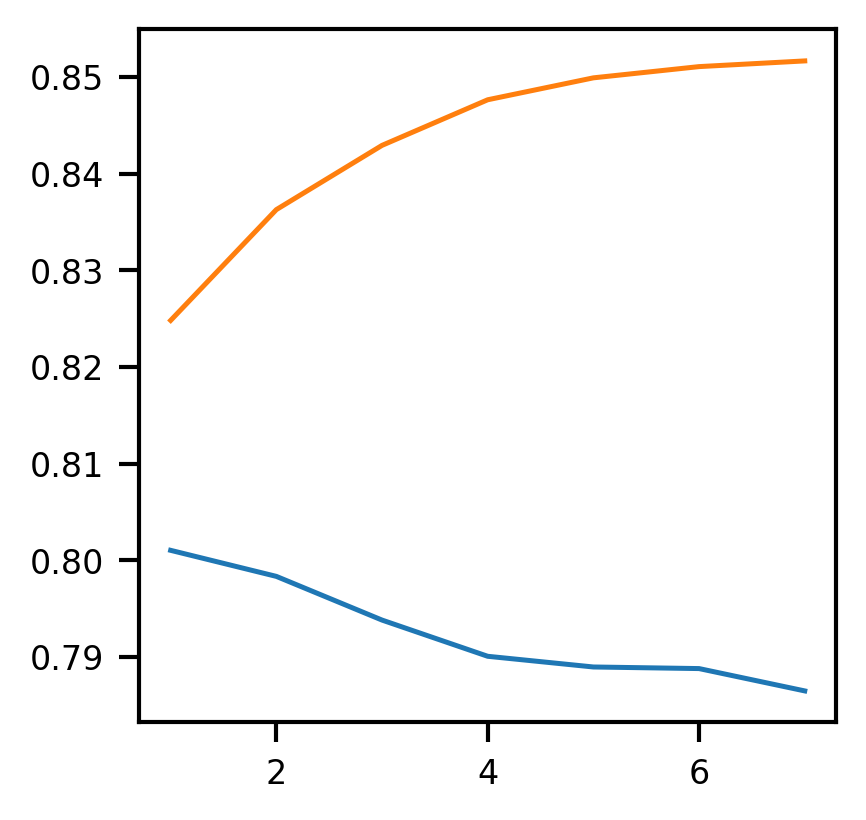

Python: [<matplotlib.lines.Line2D object at 0x2a29a94f0>]

In [34]:
eps_idx = 6
q_idx = 30
hyp_idx = 1

epsilon = eps_vals[eps_idx]
N_Quanta = q_vals[q_idx]
NT_per_Second = NT_vals[hyp_idx]
mem_slope = mem_slopes[hyp_idx]

these_res = load_results(epsilon, N_Quanta, NT_per_Second, mem_slope; exp_num = 1, on_cluster = false)

p_neutral_res = these_res[1:7]
p_retro_res = these_res[8:14]
fig,ax = subplots(1,dpi=300, figsize=(3,3))
ax.plot(1:7, p_neutral_res)
ax.plot(1:7, p_retro_res, label = "")


#### Load the true res

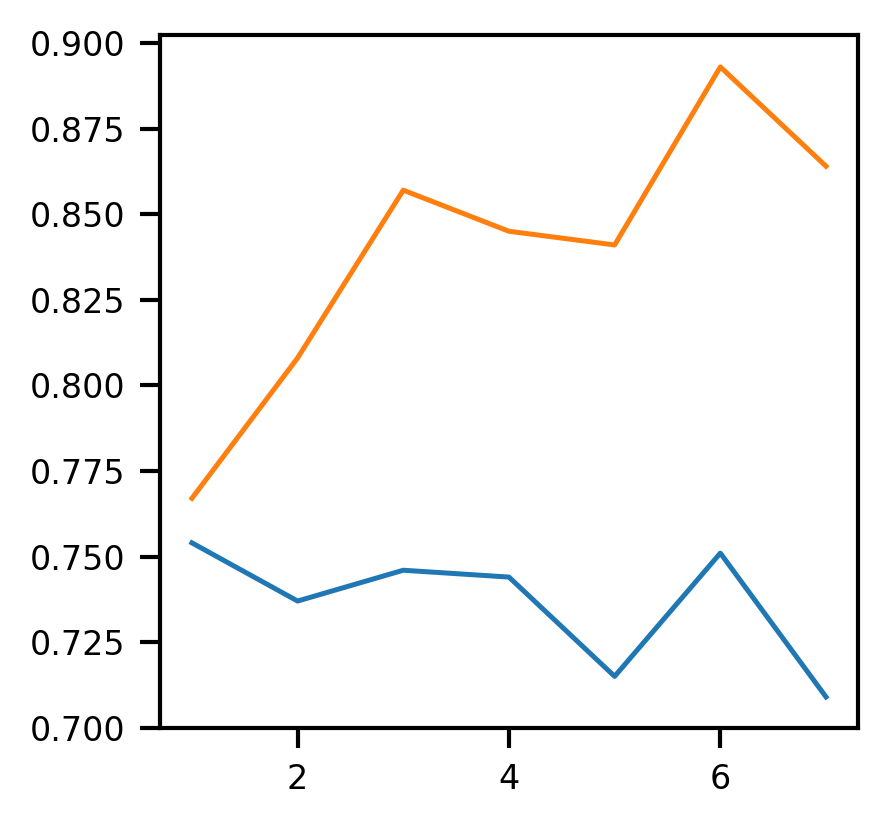

Python: [<matplotlib.lines.Line2D object at 0x2a24cc680>]

In [43]:
true_neutral_res = [.754 .737 .746 .744 .715 .751 .709]'
true_retro_res = [.767 .808 .857 .845 .841 .893 .864]'
true_res = [true_neutral_res; true_retro_res];

fig,ax = subplots(1,dpi=300, figsize=(3,3))
ax.plot(1:7, true_neutral_res)
ax.plot(1:7, true_retro_res, label = "")


### Compute mean squared error for all parameter combinations...

In [11]:
these_res = load_results(epsilon, N_Quanta, NT_per_Second, mem_slope; exp_num = 1, on_cluster = false)

14-element Vector{Float64}:
 0.7437695272743418
 0.7409702197391737
 0.7409462316329297
 0.7353913148420426
 0.7337417050932677
 0.7337548517977429
 0.7279259752941661
 0.7904931471343485
 0.8051587000066487
 0.8098547074082583
 0.8123779039361537
 0.813187135736175
 0.813809361956798
 0.8139892442162475

In [47]:
mse_res = zeros(N_eps, N_q)

for (ep_idx, epsilon) in enumerate(eps_vals)
    for (q_idx, N_Quanta) in enumerate(q_vals)
        for hyp_idx in 1:length(mem_slopes)
            
            NT_per_Second = NT_vals[hyp_idx]
            mem_slope = mem_slopes[hyp_idx]
            
            these_res = load_results(epsilon, N_Quanta, NT_per_Second, mem_slope; exp_num = 1, on_cluster = false)
            
            this_mse = sum((these_res .- true_res).^2)
            mse_res[ep_idx, q_idx] = this_mse
            
        end
    end
end



### Make MSE plot

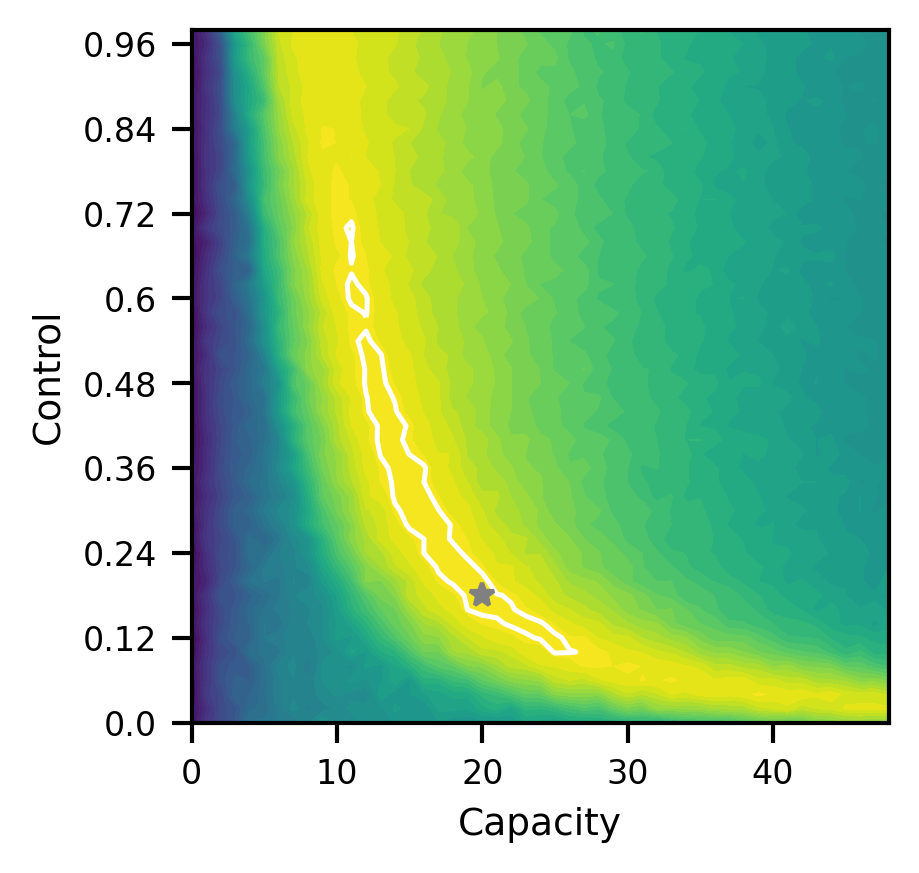

Python: [<matplotlib.lines.Line2D object at 0x2a76e1f40>]

In [68]:
fig,ax = subplots(1,dpi=300, figsize=(3,3))
ax.contourf(-1*mse_res, levels = 40)
this_val_5 = percentile(mse_res[:,:][:], 2.5)
ax.contour(mse_res[:,:], levels = [this_val_5],  colors = "w")

lab_inc = 6

ax.set_yticks(0:lab_inc:N_eps-1)
ax.set_yticklabels(c_vals[1:lab_inc:N_eps])
ax.set_ylabel("Control")
ax.set_xlabel("Capacity")

model_info = Dict()
model_info["MSE"] = minimum(mse_res)
best_pidx = argmin(mse_res)
model_info["Eps"] = eps_vals[best_pidx[1]]
model_info["Q"] = Int(q_vals[best_pidx[2]])

ax.plot(best_pidx[2]-1, best_pidx[1]-1, "*", ms = 6, color = "gray")

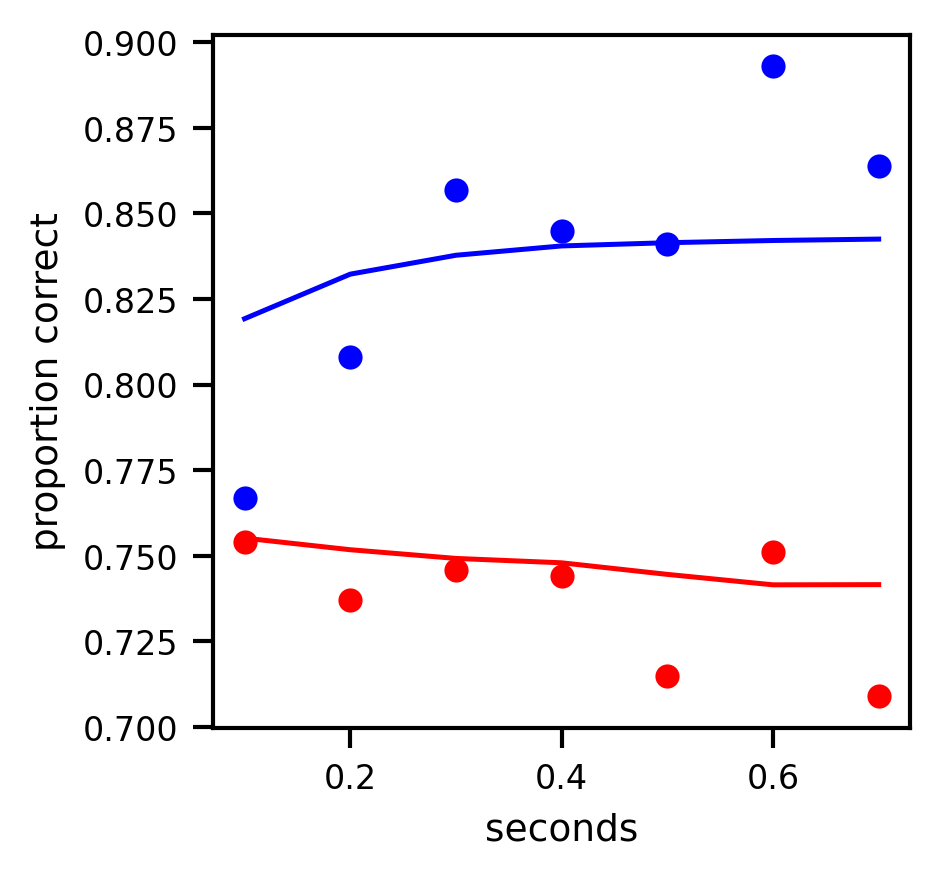

Python: Text(66.00000000000004, 0.5, 'proportion correct')

In [81]:
best_model_res = load_results(model_info["Eps"], model_info["Q"], NT_per_Second, mem_slope; exp_num = 1, on_cluster = false)
best_neutral_res = best_model_res[1:7]
best_retro_res = best_model_res[8:14]

time_vals = .1:.1:.7

fig,ax = subplots(1,dpi=300, figsize=(3,3))
ax.plot(time_vals, best_neutral_res, "r")
ax.plot(time_vals, best_retro_res, "b")

ax.plot(time_vals, true_neutral_res, "ro")
ax.plot(time_vals, true_retro_res, label = "", "bo")
ax.set_xlabel("seconds")
ax.set_ylabel("proportion correct")
